# Stack Overflow Developers Survey, 2017

## Hypothesis Testing:

In this notebook, we are interested in testing whether

1) Average job satisfaction for bootcamp graduates is diferent as for non bootcamp graduates. 

2) Average job satisfaction for individuals with higher formal education is different as for individuals with maximum of bachelor's degree.

### Job Satisfaction vs Bootcamp

So in this experiment, we’re going to analyze the average job satisfaction metric for bootcamp and non-bootcamp graduates $\mu_{bg}$and $\mu_{nbg}$ respectively.

let's set up our null and alternative hypotheses:

$H_{0}$: There is no difference in average Job satisfaction for bootcamp and non-bootcamp graduates.

vs $H_{1}$: Bootcamp graduates have higher job satisfaction.

**Mathematically**

#### One sided alterative:

\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} > 0
\end{align}

**or**

\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} < 0
\end{align}

#### Two-sided alternative
\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} \neq 0
\end{align}

Now that we have our hypothesis setup, let us analyze our data.

In [22]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sb
from collections import defaultdict 
%matplotlib inline

np.random.seeds(42)

In [2]:
#load data
df = pd.read_csv('survey-results-public.csv')
df_schema = pd.read_csv('survey-results-schema.csv')

In [3]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True]

print("Number of non bootcamp graduates is {}".format(not_bootcamp_df.shape[0]))
print("Number of bootcamp graduates is {}".format(bootcamp_df.shape[0]))

Number of non bootcamp graduates is 48790
Number of bootcamp graduates is 2602


In [30]:
print("Average job satisfaction for non bootcamp graduates is {}".format(not_bootcamp_df['JobSatisfaction'].mean()))
print("Average job satisfaction for bootcamp graduates is {}".format(bootcamp_df['JobSatisfaction'].mean()))

Average job satisfaction for non bootcamp graduates is 6.952373463343032
Average job satisfaction for bootcamp graduates is 7.037752808988764


In [4]:
#'According to FormalEducation, which group has the highest average job satisfaction?'
bootcamp_df['JobSatisfaction'].mean()

7.037752808988764

In [5]:
not_bootcamp_df['JobSatisfaction'].mean()

6.952373463343032

In [8]:
obs_diff = bootcamp_df['JobSatisfaction'].mean() - not_bootcamp_df['JobSatisfaction'].mean()
obs_diff

0.08537934564573213

In [9]:
diffs = []
#sample_df = df.sample(df.shape[0])

for _ in range(10000):
    boot_sample_bg = bootcamp_df.sample(bootcamp_df.shape[0], replace = True)
    boot_sample_nbg = not_bootcamp_df.sample(not_bootcamp_df.shape[0], replace = True)
    mean_bg = boot_sample_bg['JobSatisfaction'].mean()
    mean_nbg = boot_sample_nbg['JobSatisfaction'].mean()
    diffs.append(mean_bg - mean_nbg)

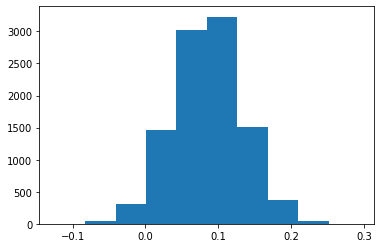

In [11]:
plt.hist(diffs);

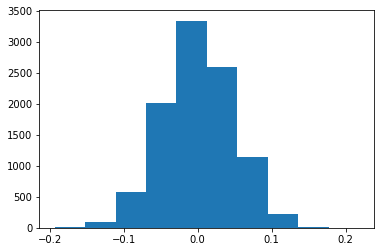

In [16]:
# Simulate distribution under the null hypothesis
diff = np.array(diffs)
null_vals = np.random.normal(0, diff.std(),diff.size)

# Plot the null distribution
plt.hist(null_vals);


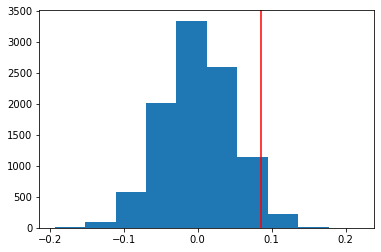

In [17]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red');

In [18]:
#pvalue
(null_vals>obs_diff).mean()

0.0376

In [19]:
(null_vals < obs_diff).mean()

0.9624

In [37]:
#values more extreme than our sample mean in either direction away from our null hyp
null_mean = 0
(null_vals > obs_diff).mean() + (null_vals < null_mean +(null_mean - obs_diff)).mean()

0.0713

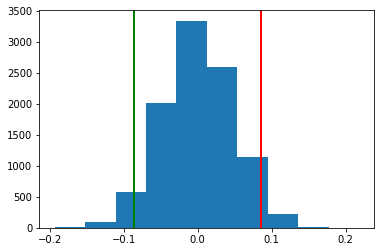

In [31]:
high = obs_diff
low = null_mean + (null_mean - obs_diff)

plt.hist(null_vals);
plt.axvline(low,color='g', linewidth=2)
plt.axvline(high,color='r', linewidth=2);

In [34]:
low,high = np.percentile(diffs, 2.5), np.percentile(diffs,97.5)
low, high

(-0.007410132970040271, 0.17890124977753208)

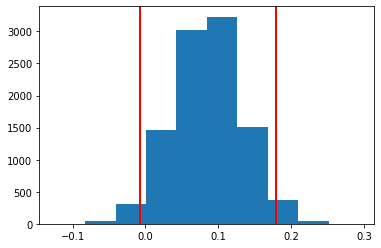

In [35]:
plt.hist(diffs);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

Notice a key value that is included in the 95% confidence interval for  $\mu_{bg}-\mu_{nbg}$: the value 0. In other words, a difference of 0 is included in our net, suggesting that $\mu_{bg}$ and $\mu_{nbg}$ are truly the same. 
  
In the above case, our interval included a value equal to zero, which would suggest we fail to reject the null hypothesis (the population mean is equal to zero).

In [66]:
df['TimeAfterBootcamp'].value_counts()

I already had a job as a developer when I started the program    1193
Immediately upon graduating                                       294
I got a job as a developer before completing the program          252
One to three months                                               228
I haven't gotten a job as a developer yet                         211
Less than a month                                                 156
Four to six months                                                105
Longer than a year                                                 85
Six months to a year                                               78
Name: TimeAfterBootcamp, dtype: int64

In [67]:
def bootcamp(bootcamp_val):
    """
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is in ("Doctoral degree", Master's degree", "Professional degree")
        return 0 otherwise
    
    """
    if bootcamp_val in df['TimeAfterBootcamp'].isnull()==False:
        return 1
    else:
        return 0

In [69]:
df["TimeAfterBootcamp"].apply(bootcamp).head() #engineering a new feature HigerEdu as defined above


0    0
1    0
2    0
3    0
4    0
Name: TimeAfterBootcamp, dtype: int64

In [70]:
df["TimeAfterBootcamp"].isnull().head()

0    True
1    True
2    True
3    True
4    True
Name: TimeAfterBootcamp, dtype: bool

In [ ]:
df['Bootcamp'] = df["TimeAfterBootcamp"].apply(bootcamp) #engineering a new feature HigerEdu as defined above

df_bg = df[df['Bootcamp'] == 1] # Subset df to only those with HigherEdu of 1
df_nbg = df[df['Bootcamp'] == 0] # Subset df to only those with HigherEdu of 0

In [38]:
def higher_edu(formal_ed_str):
    """
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is in ("Doctoral degree", Master's degree", "Professional degree")
        return 0 otherwise
    
    """
    if formal_ed_str in ("Doctoral degree", "Master's degree", "Professional degree"):
        return 1
    else:
        return 0

In [39]:
df['HigherEdu'] = df["FormalEducation"].apply(higher_edu) #engineering a new feature HigerEdu as defined above

df_edu_1 = df[df['HigherEdu'] == 1] # Subset df to only those with HigherEdu of 1
df_edu_0 = df[df['HigherEdu'] == 0] # Subset df to only those with HigherEdu of 0



In [40]:
print("Average job satisfaction for those with higher education is {}".format(df_edu_1['JobSatisfaction'].mean()))
print("Average job satisfaction for those with bachelors as highest education is {}".format(df_edu_0['JobSatisfaction'].mean()))

Average job satisfaction for those with higher education is 6.998915763135947
Average job satisfaction for those with bachelors as highest education is 6.939406749806243


In [41]:
obs_diff = df_edu_1['JobSatisfaction'].mean() - df_edu_0['JobSatisfaction'].mean()
obs_diff

0.05950901332970382

In [53]:
diffs = []
#sample_df = df.sample(df.shape[0])

for _ in range(10000):
    boot_sample_he = df_edu_1.sample(df_edu_1.shape[0], replace = True)
    boot_sample_nhe = df_edu_0.sample(df_edu_0.shape[0], replace = True)
    mean_he = boot_sample_he['JobSatisfaction'].mean()
    mean_nhe = boot_sample_nhe['JobSatisfaction'].mean()
    diffs.append(mean_he - mean_nhe)

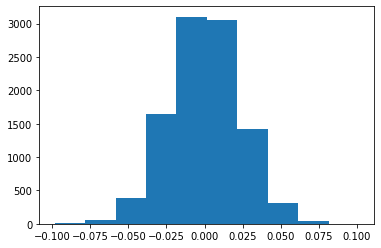

In [60]:
# Simulate distribution under the null hypothesis
diff = np.array(diffs)
null_vals = np.random.normal(0, diff.std(),diff.size)

# Plot the null distribution
plt.hist(null_vals);

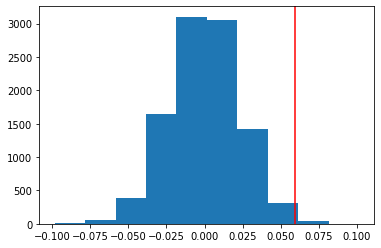

In [61]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red');

In [62]:
(null_vals>obs_diff).mean()

0.0049

In [56]:
(null_vals<obs_diff).mean()

0.8883

In [57]:
#values more extreme than our sample mean in either direction away from our null hyp
null_mean = 0
(null_vals > obs_diff).mean() + (null_vals < null_mean +(null_mean - obs_diff)).mean()

0.21289999999999998

In [63]:
low,high = np.percentile(diffs, 2.5), np.percentile(diffs,97.5)
low, high

(0.014537045809906468, 0.10442464319487293)

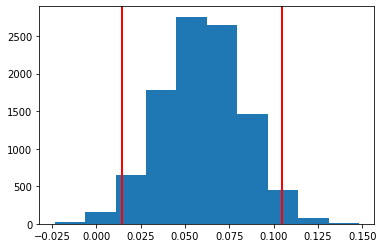

In [64]:
plt.hist(diffs);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

Notice a key value that is not included in the 95% confidence interval for  $\mu_{he}-\mu_{nhe}$: the value 0. In other words, a difference of 0 is not included in our net, suggesting that $\mu_{bg}$ and $\mu_{nbg}$ are truly different!. 
  
In the above case, our interval did not include a value equal to zero, which would suggest we reject the null hypothesis (the population mean is not equal to zero).

## Conclusion

While having a bachelor's degree is a foundation towards breaking into the field of software development, we have seen that there are other ways to become a software developer, like bootcamp, self education, before a higher education like Masters, Phd or professional certificates will give you a better job satisfaction.